In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import os.path as path
import itertools
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Input,InputLayer, Dense, Activation, BatchNormalization, Flatten, Conv2D
from tensorflow.keras.layers import MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint,LearningRateScheduler, \
                                        EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical, multi_gpu_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [4]:
data_dir = 'data/'

In [5]:
train_data = np.load(path.join(data_dir, 'imagenet_6_class_172_train_data.npz'))
val_data = np.load(path.join(data_dir, 'imagenet_6_class_172_val_data.npz'))

In [6]:
x_train = train_data['x_data']
y_train = train_data['y_data']
x_val = val_data['x_data']
y_val = val_data['y_data']
x_test = x_val
y_test = y_val
y_list = val_data['y_list']

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape, y_table_array.shape

((4680, 341, 341, 3),
 (4680,),
 (1560, 341, 341, 3),
 (1560,),
 (1560, 341, 341, 3),
 (1560,),
 (6, 2))

In [7]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = y_val

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((4680, 341, 341, 3),
 (4680, 6),
 (1560, 341, 341, 3),
 (1560, 6),
 (1560, 341, 341, 3),
 (1560, 6))

In [9]:
input_shape = x_train[0].shape
output_size = len(y_list)

In [10]:
def build_2d_cnn_custom_ch_32_DO(conv_num=1):
    input_layer = Input(shape=input_shape)
    x = input_layer

    for i in range(conv_num):
        x = Conv2D(kernel_size=5, filters=32*(2**(i//2)), strides=(1,1), padding='same')(x)
#         x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = MaxPooling2D(pool_size=3, strides=(2,2), padding='same')(x)

    x = Flatten()(x)
  
    x = Dropout(0.5)(x)
    output_layer = Dense(output_size, activation='softmax')(x)
    
    model = Model(inputs=input_layer, outputs=output_layer)
    
    return model

In [11]:
for i in range(1, 8):
    model = build_2d_cnn_custom_ch_32_DO(conv_num=i)
    model.summary()
    del model

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 341, 341, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 341, 341, 32)      2432      
_________________________________________________________________
activation (Activation)      (None, 341, 341, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 114, 114, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 415872)            0         
_________________________________________________________________
dropout (Dropout)    

In [12]:
data_generator = ImageDataGenerator(
                    rotation_range=30,
                    width_shift_range=0.15,
                    height_shift_range=0.15,
                    shear_range=0.15,
                    zoom_range=0.15,
                    horizontal_flip=True,
                    fill_mode='nearest')

Instructions for updating:
Use tf.cast instead.
Epoch 1/10000
25/25 [==============================] - 12s 469ms/step - loss: 1.4610 - acc: 0.4276

Epoch 00001: val_loss improved from inf to 1.46097, saving model to model/checkpoint/vis_imagenet_6_class_augmentation_2D_CNN_custom_ch_32_DO_050_DO_3_conv_checkpoint/001-1.4610.hdf5
74/74 [==============================] - 43s 586ms/step - loss: 1.6813 - acc: 0.2861 - val_loss: 1.4610 - val_acc: 0.4276
Epoch 2/10000
25/25 [==============================] - 11s 454ms/step - loss: 1.2990 - acc: 0.4776

Epoch 00002: val_loss improved from 1.46097 to 1.29901, saving model to model/checkpoint/vis_imagenet_6_class_augmentation_2D_CNN_custom_ch_32_DO_050_DO_3_conv_checkpoint/002-1.2990.hdf5
74/74 [==============================] - 39s 532ms/step - loss: 1.4061 - acc: 0.4214 - val_loss: 1.2990 - val_acc: 0.4776
Epoch 3/10000
25/25 [==============================] - 11s 460ms/step - loss: 1.2090 - acc: 0.5179

Epoch 00003: val_loss improved from 1.

Epoch 23/10000
25/25 [==============================] - 12s 471ms/step - loss: 0.8832 - acc: 0.6821

Epoch 00023: val_loss improved from 0.90662 to 0.88320, saving model to model/checkpoint/vis_imagenet_6_class_augmentation_2D_CNN_custom_ch_32_DO_050_DO_3_conv_checkpoint/023-0.8832.hdf5
74/74 [==============================] - 39s 521ms/step - loss: 0.9187 - acc: 0.6791 - val_loss: 0.8832 - val_acc: 0.6821
Epoch 24/10000
25/25 [==============================] - 12s 473ms/step - loss: 0.8867 - acc: 0.6795

Epoch 00024: val_loss did not improve from 0.88320
74/74 [==============================] - 39s 522ms/step - loss: 0.8960 - acc: 0.6814 - val_loss: 0.8867 - val_acc: 0.6795
Epoch 25/10000
25/25 [==============================] - 12s 467ms/step - loss: 0.8813 - acc: 0.6641

Epoch 00025: val_loss improved from 0.88320 to 0.88134, saving model to model/checkpoint/vis_imagenet_6_class_augmentation_2D_CNN_custom_ch_32_DO_050_DO_3_conv_checkpoint/025-0.8813.hdf5
74/74 [=====================

Epoch 49/10000
25/25 [==============================] - 11s 452ms/step - loss: 0.8367 - acc: 0.6955

Epoch 00049: val_loss did not improve from 0.75987
74/74 [==============================] - 39s 523ms/step - loss: 0.7511 - acc: 0.7361 - val_loss: 0.8367 - val_acc: 0.6955
Epoch 50/10000
25/25 [==============================] - 12s 472ms/step - loss: 0.8004 - acc: 0.7019

Epoch 00050: val_loss did not improve from 0.75987
74/74 [==============================] - 39s 524ms/step - loss: 0.7642 - acc: 0.7263 - val_loss: 0.8004 - val_acc: 0.7019
Epoch 51/10000
25/25 [==============================] - 11s 457ms/step - loss: 0.7508 - acc: 0.7321

Epoch 00051: val_loss improved from 0.75987 to 0.75084, saving model to model/checkpoint/vis_imagenet_6_class_augmentation_2D_CNN_custom_ch_32_DO_050_DO_3_conv_checkpoint/051-0.7508.hdf5
74/74 [==============================] - 38s 514ms/step - loss: 0.7426 - acc: 0.7404 - val_loss: 0.7508 - val_acc: 0.7321
Epoch 52/10000
25/25 [====================

Epoch 76/10000
25/25 [==============================] - 12s 463ms/step - loss: 0.7105 - acc: 0.7494

Epoch 00076: val_loss did not improve from 0.68756
74/74 [==============================] - 38s 512ms/step - loss: 0.6541 - acc: 0.7643 - val_loss: 0.7105 - val_acc: 0.7494
Epoch 77/10000
25/25 [==============================] - 12s 464ms/step - loss: 0.7071 - acc: 0.7404

Epoch 00077: val_loss did not improve from 0.68756
74/74 [==============================] - 38s 509ms/step - loss: 0.6749 - acc: 0.7600 - val_loss: 0.7071 - val_acc: 0.7404
Epoch 78/10000
25/25 [==============================] - 12s 462ms/step - loss: 0.7096 - acc: 0.7468

Epoch 00078: val_loss did not improve from 0.68756
74/74 [==============================] - 38s 515ms/step - loss: 0.6623 - acc: 0.7568 - val_loss: 0.7096 - val_acc: 0.7468
Epoch 79/10000
25/25 [==============================] - 12s 465ms/step - loss: 0.7310 - acc: 0.7410

Epoch 00079: val_loss did not improve from 0.68756
74/74 [===================

Epoch 104/10000
25/25 [==============================] - 11s 451ms/step - loss: 0.6604 - acc: 0.7686

Epoch 00104: val_loss did not improve from 0.62044
74/74 [==============================] - 38s 513ms/step - loss: 0.6079 - acc: 0.7801 - val_loss: 0.6604 - val_acc: 0.7686
Epoch 105/10000
25/25 [==============================] - 12s 462ms/step - loss: 0.6611 - acc: 0.7788

Epoch 00105: val_loss did not improve from 0.62044
74/74 [==============================] - 38s 520ms/step - loss: 0.6184 - acc: 0.7737 - val_loss: 0.6611 - val_acc: 0.7788
Epoch 106/10000
25/25 [==============================] - 12s 464ms/step - loss: 0.6659 - acc: 0.7673

Epoch 00106: val_loss did not improve from 0.62044
74/74 [==============================] - 38s 520ms/step - loss: 0.5980 - acc: 0.7904 - val_loss: 0.6659 - val_acc: 0.7673
Epoch 107/10000
25/25 [==============================] - 11s 455ms/step - loss: 0.6539 - acc: 0.7699

Epoch 00107: val_loss did not improve from 0.62044
74/74 [===============

Epoch 133/10000
25/25 [==============================] - 12s 462ms/step - loss: 0.6105 - acc: 0.7776

Epoch 00133: val_loss did not improve from 0.57721
74/74 [==============================] - 38s 515ms/step - loss: 0.5362 - acc: 0.8083 - val_loss: 0.6105 - val_acc: 0.7776
Epoch 134/10000
25/25 [==============================] - 11s 457ms/step - loss: 0.5684 - acc: 0.8077

Epoch 00134: val_loss improved from 0.57721 to 0.56843, saving model to model/checkpoint/vis_imagenet_6_class_augmentation_2D_CNN_custom_ch_32_DO_050_DO_3_conv_checkpoint/134-0.5684.hdf5
74/74 [==============================] - 38s 519ms/step - loss: 0.5492 - acc: 0.8079 - val_loss: 0.5684 - val_acc: 0.8077
Epoch 135/10000
25/25 [==============================] - 11s 455ms/step - loss: 0.5962 - acc: 0.7840

Epoch 00135: val_loss did not improve from 0.56843
74/74 [==============================] - 38s 519ms/step - loss: 0.5298 - acc: 0.8128 - val_loss: 0.5962 - val_acc: 0.7840
Epoch 136/10000
25/25 [================

Epoch 161/10000
25/25 [==============================] - 11s 449ms/step - loss: 0.5933 - acc: 0.8013

Epoch 00161: val_loss did not improve from 0.55844
74/74 [==============================] - 38s 507ms/step - loss: 0.4954 - acc: 0.8291 - val_loss: 0.5933 - val_acc: 0.8013
Epoch 162/10000
25/25 [==============================] - 12s 470ms/step - loss: 0.5555 - acc: 0.8135

Epoch 00162: val_loss improved from 0.55844 to 0.55555, saving model to model/checkpoint/vis_imagenet_6_class_augmentation_2D_CNN_custom_ch_32_DO_050_DO_3_conv_checkpoint/162-0.5555.hdf5
74/74 [==============================] - 39s 523ms/step - loss: 0.4931 - acc: 0.8241 - val_loss: 0.5555 - val_acc: 0.8135
Epoch 163/10000
25/25 [==============================] - 11s 458ms/step - loss: 0.5688 - acc: 0.7917

Epoch 00163: val_loss did not improve from 0.55555
74/74 [==============================] - 38s 518ms/step - loss: 0.4922 - acc: 0.8207 - val_loss: 0.5688 - val_acc: 0.7917
Epoch 164/10000
25/25 [================


Epoch 00217: val_loss did not improve from 0.50476
74/74 [==============================] - 38s 513ms/step - loss: 0.4154 - acc: 0.8526 - val_loss: 0.5177 - val_acc: 0.8186
Epoch 218/10000
25/25 [==============================] - 11s 450ms/step - loss: 0.5029 - acc: 0.8288

Epoch 00218: val_loss improved from 0.50476 to 0.50295, saving model to model/checkpoint/vis_imagenet_6_class_augmentation_2D_CNN_custom_ch_32_DO_050_DO_3_conv_checkpoint/218-0.5029.hdf5
74/74 [==============================] - 38s 514ms/step - loss: 0.4175 - acc: 0.8511 - val_loss: 0.5029 - val_acc: 0.8288
Epoch 219/10000
25/25 [==============================] - 12s 470ms/step - loss: 0.5201 - acc: 0.8231

Epoch 00219: val_loss did not improve from 0.50295
74/74 [==============================] - 38s 517ms/step - loss: 0.4266 - acc: 0.8509 - val_loss: 0.5201 - val_acc: 0.8231
Epoch 220/10000
25/25 [==============================] - 12s 472ms/step - loss: 0.5595 - acc: 0.8167

Epoch 00220: val_loss did not improve 

Epoch 245/10000
25/25 [==============================] - 12s 461ms/step - loss: 0.4910 - acc: 0.8378

Epoch 00245: val_loss did not improve from 0.48138
74/74 [==============================] - 38s 508ms/step - loss: 0.3959 - acc: 0.8603 - val_loss: 0.4910 - val_acc: 0.8378
Epoch 246/10000
25/25 [==============================] - 11s 457ms/step - loss: 0.5104 - acc: 0.8256

Epoch 00246: val_loss did not improve from 0.48138
74/74 [==============================] - 38s 519ms/step - loss: 0.3940 - acc: 0.8641 - val_loss: 0.5104 - val_acc: 0.8256
Epoch 247/10000
25/25 [==============================] - 12s 460ms/step - loss: 0.5459 - acc: 0.8167

Epoch 00247: val_loss did not improve from 0.48138
74/74 [==============================] - 38s 512ms/step - loss: 0.3942 - acc: 0.8583 - val_loss: 0.5459 - val_acc: 0.8167
Epoch 248/10000
25/25 [==============================] - 11s 459ms/step - loss: 0.5177 - acc: 0.8231

Epoch 00248: val_loss did not improve from 0.48138
74/74 [===============


Epoch 00303: val_loss did not improve from 0.44719
74/74 [==============================] - 37s 504ms/step - loss: 0.3612 - acc: 0.8722 - val_loss: 0.4700 - val_acc: 0.8378
Epoch 304/10000
25/25 [==============================] - 12s 462ms/step - loss: 0.5043 - acc: 0.8321

Epoch 00304: val_loss did not improve from 0.44719
74/74 [==============================] - 38s 511ms/step - loss: 0.3704 - acc: 0.8718 - val_loss: 0.5043 - val_acc: 0.8321
Epoch 305/10000
25/25 [==============================] - 11s 457ms/step - loss: 0.4657 - acc: 0.8506

Epoch 00305: val_loss did not improve from 0.44719
74/74 [==============================] - 38s 510ms/step - loss: 0.3381 - acc: 0.8840 - val_loss: 0.4657 - val_acc: 0.8506
Epoch 306/10000
25/25 [==============================] - 12s 461ms/step - loss: 0.4991 - acc: 0.8346

Epoch 00306: val_loss did not improve from 0.44719
74/74 [==============================] - 38s 508ms/step - loss: 0.3267 - acc: 0.8865 - val_loss: 0.4991 - val_acc: 0.8346
E

Epoch 362/10000
25/25 [==============================] - 12s 471ms/step - loss: 0.4757 - acc: 0.8449

Epoch 00362: val_loss did not improve from 0.42747
74/74 [==============================] - 39s 521ms/step - loss: 0.3112 - acc: 0.8906 - val_loss: 0.4757 - val_acc: 0.8449
Epoch 363/10000
25/25 [==============================] - 11s 456ms/step - loss: 0.4796 - acc: 0.8442

Epoch 00363: val_loss did not improve from 0.42747
74/74 [==============================] - 38s 514ms/step - loss: 0.3064 - acc: 0.8897 - val_loss: 0.4796 - val_acc: 0.8442
Epoch 364/10000
25/25 [==============================] - 11s 441ms/step - loss: 0.4657 - acc: 0.8417

Epoch 00364: val_loss did not improve from 0.42747
74/74 [==============================] - 37s 505ms/step - loss: 0.3149 - acc: 0.8900 - val_loss: 0.4657 - val_acc: 0.8417
Epoch 365/10000
25/25 [==============================] - 11s 459ms/step - loss: 0.4717 - acc: 0.8564

Epoch 00365: val_loss did not improve from 0.42747
74/74 [===============

Epoch 391/10000
25/25 [==============================] - 11s 458ms/step - loss: 0.4472 - acc: 0.8487

Epoch 00391: val_loss did not improve from 0.41165
74/74 [==============================] - 37s 505ms/step - loss: 0.3045 - acc: 0.8925 - val_loss: 0.4472 - val_acc: 0.8487
Epoch 392/10000
25/25 [==============================] - 11s 460ms/step - loss: 0.4589 - acc: 0.8442

Epoch 00392: val_loss did not improve from 0.41165
74/74 [==============================] - 38s 514ms/step - loss: 0.2840 - acc: 0.9013 - val_loss: 0.4589 - val_acc: 0.8442
Epoch 393/10000
25/25 [==============================] - 12s 474ms/step - loss: 0.4308 - acc: 0.8667

Epoch 00393: val_loss did not improve from 0.41165
74/74 [==============================] - 38s 514ms/step - loss: 0.3037 - acc: 0.8925 - val_loss: 0.4308 - val_acc: 0.8667
Epoch 394/10000
25/25 [==============================] - 12s 473ms/step - loss: 0.4435 - acc: 0.8545

Epoch 00394: val_loss did not improve from 0.41165
74/74 [===============

Epoch 421/10000
25/25 [==============================] - 12s 471ms/step - loss: 0.4305 - acc: 0.8647

Epoch 00421: val_loss did not improve from 0.41165
74/74 [==============================] - 38s 510ms/step - loss: 0.2767 - acc: 0.9013 - val_loss: 0.4305 - val_acc: 0.8647
Epoch 422/10000
25/25 [==============================] - 11s 457ms/step - loss: 0.4535 - acc: 0.8500

Epoch 00422: val_loss did not improve from 0.41165
74/74 [==============================] - 38s 513ms/step - loss: 0.3078 - acc: 0.8932 - val_loss: 0.4535 - val_acc: 0.8500
Epoch 423/10000
25/25 [==============================] - 11s 457ms/step - loss: 0.4226 - acc: 0.8590

Epoch 00423: val_loss did not improve from 0.41165
74/74 [==============================] - 38s 507ms/step - loss: 0.2678 - acc: 0.9115 - val_loss: 0.4226 - val_acc: 0.8590
Epoch 424/10000
25/25 [==============================] - 11s 448ms/step - loss: 0.4482 - acc: 0.8532

Epoch 00424: val_loss did not improve from 0.41165
74/74 [===============

Epoch 451/10000
25/25 [==============================] - 11s 444ms/step - loss: 0.4335 - acc: 0.8571

Epoch 00451: val_loss did not improve from 0.41165
74/74 [==============================] - 38s 508ms/step - loss: 0.2615 - acc: 0.9098 - val_loss: 0.4335 - val_acc: 0.8571
Epoch 452/10000
25/25 [==============================] - 12s 469ms/step - loss: 0.4543 - acc: 0.8551

Epoch 00452: val_loss did not improve from 0.41165
74/74 [==============================] - 38s 511ms/step - loss: 0.2575 - acc: 0.9098 - val_loss: 0.4543 - val_acc: 0.8551
Epoch 453/10000
25/25 [==============================] - 11s 450ms/step - loss: 0.4251 - acc: 0.8718

Epoch 00453: val_loss did not improve from 0.41165
74/74 [==============================] - 37s 505ms/step - loss: 0.2674 - acc: 0.9071 - val_loss: 0.4251 - val_acc: 0.8718
Epoch 454/10000
25/25 [==============================] - 11s 460ms/step - loss: 0.4250 - acc: 0.8603

Epoch 00454: val_loss did not improve from 0.41165
74/74 [===============

Epoch 509/10000
25/25 [==============================] - 12s 473ms/step - loss: 0.4483 - acc: 0.8673

Epoch 00509: val_loss did not improve from 0.40073
74/74 [==============================] - 38s 516ms/step - loss: 0.2530 - acc: 0.9098 - val_loss: 0.4483 - val_acc: 0.8673
Epoch 510/10000
25/25 [==============================] - 12s 466ms/step - loss: 0.4332 - acc: 0.8679

Epoch 00510: val_loss did not improve from 0.40073
74/74 [==============================] - 38s 519ms/step - loss: 0.2286 - acc: 0.9197 - val_loss: 0.4332 - val_acc: 0.8679
Epoch 511/10000
25/25 [==============================] - 12s 467ms/step - loss: 0.4334 - acc: 0.8577

Epoch 00511: val_loss did not improve from 0.40073
74/74 [==============================] - 38s 514ms/step - loss: 0.2365 - acc: 0.9167 - val_loss: 0.4334 - val_acc: 0.8577
Epoch 512/10000
25/25 [==============================] - 11s 452ms/step - loss: 0.4618 - acc: 0.8526

Epoch 00512: val_loss did not improve from 0.40073
74/74 [===============

Epoch 568/10000
25/25 [==============================] - 12s 466ms/step - loss: 0.4200 - acc: 0.8724

Epoch 00568: val_loss did not improve from 0.39877
74/74 [==============================] - 38s 510ms/step - loss: 0.2214 - acc: 0.9216 - val_loss: 0.4200 - val_acc: 0.8724
Epoch 569/10000
25/25 [==============================] - 11s 458ms/step - loss: 0.4415 - acc: 0.8538

Epoch 00569: val_loss did not improve from 0.39877
74/74 [==============================] - 38s 512ms/step - loss: 0.2238 - acc: 0.9218 - val_loss: 0.4415 - val_acc: 0.8538
Epoch 570/10000
25/25 [==============================] - 12s 463ms/step - loss: 0.3948 - acc: 0.8667

Epoch 00570: val_loss improved from 0.39877 to 0.39481, saving model to model/checkpoint/vis_imagenet_6_class_augmentation_2D_CNN_custom_ch_32_DO_050_DO_3_conv_checkpoint/570-0.3948.hdf5
74/74 [==============================] - 38s 515ms/step - loss: 0.2172 - acc: 0.9269 - val_loss: 0.3948 - val_acc: 0.8667
Epoch 571/10000
25/25 [================

Epoch 597/10000
25/25 [==============================] - 11s 455ms/step - loss: 0.4383 - acc: 0.8686

Epoch 00597: val_loss did not improve from 0.38301
74/74 [==============================] - 37s 502ms/step - loss: 0.2250 - acc: 0.9231 - val_loss: 0.4383 - val_acc: 0.8686
Epoch 598/10000
25/25 [==============================] - 12s 463ms/step - loss: 0.4444 - acc: 0.8622

Epoch 00598: val_loss did not improve from 0.38301
74/74 [==============================] - 38s 509ms/step - loss: 0.2188 - acc: 0.9214 - val_loss: 0.4444 - val_acc: 0.8622
Epoch 599/10000
25/25 [==============================] - 12s 464ms/step - loss: 0.4424 - acc: 0.8660

Epoch 00599: val_loss did not improve from 0.38301
74/74 [==============================] - 37s 502ms/step - loss: 0.2136 - acc: 0.9224 - val_loss: 0.4424 - val_acc: 0.8660
Epoch 600/10000
25/25 [==============================] - 12s 469ms/step - loss: 0.4215 - acc: 0.8782

Epoch 00600: val_loss did not improve from 0.38301
74/74 [===============

Epoch 627/10000
25/25 [==============================] - 11s 460ms/step - loss: 0.4371 - acc: 0.8622

Epoch 00627: val_loss did not improve from 0.38301
74/74 [==============================] - 37s 505ms/step - loss: 0.2151 - acc: 0.9246 - val_loss: 0.4371 - val_acc: 0.8622
Epoch 628/10000
25/25 [==============================] - 11s 456ms/step - loss: 0.4664 - acc: 0.8596

Epoch 00628: val_loss did not improve from 0.38301
74/74 [==============================] - 38s 507ms/step - loss: 0.2269 - acc: 0.9209 - val_loss: 0.4664 - val_acc: 0.8596
Epoch 629/10000
25/25 [==============================] - 11s 457ms/step - loss: 0.4278 - acc: 0.8673

Epoch 00629: val_loss did not improve from 0.38301
74/74 [==============================] - 37s 507ms/step - loss: 0.2166 - acc: 0.9235 - val_loss: 0.4278 - val_acc: 0.8673
Epoch 630/10000
25/25 [==============================] - 12s 463ms/step - loss: 0.4204 - acc: 0.8692

Epoch 00630: val_loss did not improve from 0.38301
74/74 [===============

Epoch 657/10000
25/25 [==============================] - 11s 454ms/step - loss: 0.4777 - acc: 0.8551

Epoch 00657: val_loss did not improve from 0.38301
74/74 [==============================] - 37s 506ms/step - loss: 0.2145 - acc: 0.9254 - val_loss: 0.4777 - val_acc: 0.8551
Epoch 658/10000
25/25 [==============================] - 11s 455ms/step - loss: 0.4390 - acc: 0.8673

Epoch 00658: val_loss did not improve from 0.38301
74/74 [==============================] - 38s 512ms/step - loss: 0.2001 - acc: 0.9261 - val_loss: 0.4390 - val_acc: 0.8673
Epoch 659/10000
25/25 [==============================] - 12s 463ms/step - loss: 0.4314 - acc: 0.8679

Epoch 00659: val_loss did not improve from 0.38301
74/74 [==============================] - 38s 512ms/step - loss: 0.1896 - acc: 0.9344 - val_loss: 0.4314 - val_acc: 0.8679
Epoch 660/10000
25/25 [==============================] - 11s 457ms/step - loss: 0.4369 - acc: 0.8699

Epoch 00660: val_loss did not improve from 0.38301
74/74 [===============

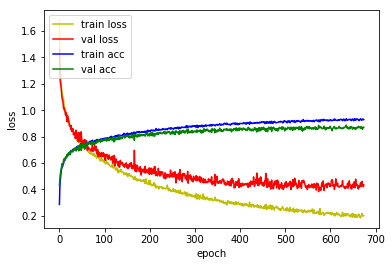

1560/1560 [==============================] - 4s 2ms/sample - loss: 0.3944 - acc: 0.8724
Loss: 0.39438937237629523 Accuracy: 0.87243587

Epoch 1/10000
25/25 [==============================] - 12s 466ms/step - loss: 1.6078 - acc: 0.3660

Epoch 00001: val_loss improved from inf to 1.60778, saving model to model/checkpoint/vis_imagenet_6_class_augmentation_2D_CNN_custom_ch_32_DO_050_DO_4_conv_checkpoint/001-1.6078.hdf5
74/74 [==============================] - 42s 567ms/step - loss: 1.7448 - acc: 0.2438 - val_loss: 1.6078 - val_acc: 0.3660
Epoch 2/10000
25/25 [==============================] - 12s 463ms/step - loss: 1.3640 - acc: 0.4750

Epoch 00002: val_loss improved from 1.60778 to 1.36395, saving model to model/checkpoint/vis_imagenet_6_class_augmentation_2D_CNN_custom_ch_32_DO_050_DO_4_conv_checkpoint/002-1.3640.hdf5
74/74 [==============================] - 38s 513ms/step - loss: 1.5014 - acc: 0.3816 - val_loss: 1.3640 - val_acc: 0.4750
Epoch 3/10000
25/25 [=============================

Epoch 23/10000
25/25 [==============================] - 11s 450ms/step - loss: 0.8780 - acc: 0.6724

Epoch 00023: val_loss improved from 0.87811 to 0.87800, saving model to model/checkpoint/vis_imagenet_6_class_augmentation_2D_CNN_custom_ch_32_DO_050_DO_4_conv_checkpoint/023-0.8780.hdf5
74/74 [==============================] - 37s 506ms/step - loss: 0.9234 - acc: 0.6603 - val_loss: 0.8780 - val_acc: 0.6724
Epoch 24/10000
25/25 [==============================] - 12s 461ms/step - loss: 0.8872 - acc: 0.6808

Epoch 00024: val_loss did not improve from 0.87800
74/74 [==============================] - 38s 511ms/step - loss: 0.8970 - acc: 0.6688 - val_loss: 0.8872 - val_acc: 0.6808
Epoch 25/10000
25/25 [==============================] - 11s 453ms/step - loss: 0.8573 - acc: 0.6821

Epoch 00025: val_loss improved from 0.87800 to 0.85734, saving model to model/checkpoint/vis_imagenet_6_class_augmentation_2D_CNN_custom_ch_32_DO_050_DO_4_conv_checkpoint/025-0.8573.hdf5
74/74 [=====================

Epoch 47/10000
25/25 [==============================] - 12s 461ms/step - loss: 0.6863 - acc: 0.7571

Epoch 00047: val_loss improved from 0.69821 to 0.68627, saving model to model/checkpoint/vis_imagenet_6_class_augmentation_2D_CNN_custom_ch_32_DO_050_DO_4_conv_checkpoint/047-0.6863.hdf5
74/74 [==============================] - 38s 512ms/step - loss: 0.7103 - acc: 0.7494 - val_loss: 0.6863 - val_acc: 0.7571
Epoch 48/10000
25/25 [==============================] - 11s 448ms/step - loss: 0.7118 - acc: 0.7372

Epoch 00048: val_loss did not improve from 0.68627
74/74 [==============================] - 38s 509ms/step - loss: 0.7193 - acc: 0.7470 - val_loss: 0.7118 - val_acc: 0.7372
Epoch 49/10000
25/25 [==============================] - 12s 466ms/step - loss: 0.6850 - acc: 0.7538

Epoch 00049: val_loss improved from 0.68627 to 0.68505, saving model to model/checkpoint/vis_imagenet_6_class_augmentation_2D_CNN_custom_ch_32_DO_050_DO_4_conv_checkpoint/049-0.6850.hdf5
74/74 [=====================

Epoch 73/10000
25/25 [==============================] - 11s 454ms/step - loss: 0.6066 - acc: 0.7782

Epoch 00073: val_loss improved from 0.60692 to 0.60661, saving model to model/checkpoint/vis_imagenet_6_class_augmentation_2D_CNN_custom_ch_32_DO_050_DO_4_conv_checkpoint/073-0.6066.hdf5
74/74 [==============================] - 38s 514ms/step - loss: 0.6057 - acc: 0.7829 - val_loss: 0.6066 - val_acc: 0.7782
Epoch 74/10000
25/25 [==============================] - 12s 461ms/step - loss: 0.6266 - acc: 0.7712

Epoch 00074: val_loss did not improve from 0.60661
74/74 [==============================] - 38s 519ms/step - loss: 0.5902 - acc: 0.7889 - val_loss: 0.6266 - val_acc: 0.7712
Epoch 75/10000
25/25 [==============================] - 11s 447ms/step - loss: 0.6423 - acc: 0.7564

Epoch 00075: val_loss did not improve from 0.60661
74/74 [==============================] - 38s 509ms/step - loss: 0.6101 - acc: 0.7902 - val_loss: 0.6423 - val_acc: 0.7564
Epoch 76/10000
25/25 [====================

Epoch 100/10000
25/25 [==============================] - 11s 457ms/step - loss: 0.5729 - acc: 0.8051

Epoch 00100: val_loss did not improve from 0.54642
74/74 [==============================] - 38s 511ms/step - loss: 0.5066 - acc: 0.8231 - val_loss: 0.5729 - val_acc: 0.8051
Epoch 101/10000
25/25 [==============================] - 11s 458ms/step - loss: 0.5730 - acc: 0.8135

Epoch 00101: val_loss did not improve from 0.54642
74/74 [==============================] - 38s 507ms/step - loss: 0.5312 - acc: 0.8130 - val_loss: 0.5730 - val_acc: 0.8135
Epoch 102/10000
25/25 [==============================] - 11s 450ms/step - loss: 0.5890 - acc: 0.7955

Epoch 00102: val_loss did not improve from 0.54642
74/74 [==============================] - 37s 505ms/step - loss: 0.5179 - acc: 0.8147 - val_loss: 0.5890 - val_acc: 0.7955
Epoch 103/10000
25/25 [==============================] - 12s 465ms/step - loss: 0.5556 - acc: 0.8115

Epoch 00103: val_loss did not improve from 0.54642
74/74 [===============

Epoch 156/10000
25/25 [==============================] - 11s 459ms/step - loss: 0.4693 - acc: 0.8353

Epoch 00156: val_loss did not improve from 0.43857
74/74 [==============================] - 38s 514ms/step - loss: 0.3869 - acc: 0.8656 - val_loss: 0.4693 - val_acc: 0.8353
Epoch 157/10000
25/25 [==============================] - 12s 476ms/step - loss: 0.4619 - acc: 0.8365

Epoch 00157: val_loss did not improve from 0.43857
74/74 [==============================] - 38s 518ms/step - loss: 0.4198 - acc: 0.8566 - val_loss: 0.4619 - val_acc: 0.8365
Epoch 158/10000
25/25 [==============================] - 11s 456ms/step - loss: 0.5021 - acc: 0.8269

Epoch 00158: val_loss did not improve from 0.43857
74/74 [==============================] - 37s 505ms/step - loss: 0.4148 - acc: 0.8506 - val_loss: 0.5021 - val_acc: 0.8269
Epoch 159/10000
25/25 [==============================] - 12s 468ms/step - loss: 0.4979 - acc: 0.8244

Epoch 00159: val_loss did not improve from 0.43857
74/74 [===============

Epoch 185/10000
25/25 [==============================] - 12s 469ms/step - loss: 0.4935 - acc: 0.8244

Epoch 00185: val_loss did not improve from 0.42614
74/74 [==============================] - 38s 516ms/step - loss: 0.3653 - acc: 0.8682 - val_loss: 0.4935 - val_acc: 0.8244
Epoch 186/10000
25/25 [==============================] - 11s 454ms/step - loss: 0.4685 - acc: 0.8397

Epoch 00186: val_loss did not improve from 0.42614
74/74 [==============================] - 38s 511ms/step - loss: 0.3655 - acc: 0.8720 - val_loss: 0.4685 - val_acc: 0.8397
Epoch 187/10000
25/25 [==============================] - 11s 450ms/step - loss: 0.4601 - acc: 0.8429

Epoch 00187: val_loss did not improve from 0.42614
74/74 [==============================] - 38s 512ms/step - loss: 0.3691 - acc: 0.8665 - val_loss: 0.4601 - val_acc: 0.8429
Epoch 188/10000
25/25 [==============================] - 12s 466ms/step - loss: 0.4516 - acc: 0.8558

Epoch 00188: val_loss did not improve from 0.42614
74/74 [===============

Epoch 215/10000
25/25 [==============================] - 11s 458ms/step - loss: 0.4540 - acc: 0.8481

Epoch 00215: val_loss did not improve from 0.42614
74/74 [==============================] - 37s 504ms/step - loss: 0.3489 - acc: 0.8746 - val_loss: 0.4540 - val_acc: 0.8481
Epoch 216/10000
25/25 [==============================] - 11s 445ms/step - loss: 0.4229 - acc: 0.8519

Epoch 00216: val_loss improved from 0.42614 to 0.42288, saving model to model/checkpoint/vis_imagenet_6_class_augmentation_2D_CNN_custom_ch_32_DO_050_DO_4_conv_checkpoint/216-0.4229.hdf5
74/74 [==============================] - 37s 507ms/step - loss: 0.3429 - acc: 0.8759 - val_loss: 0.4229 - val_acc: 0.8519
Epoch 217/10000
25/25 [==============================] - 12s 463ms/step - loss: 0.4334 - acc: 0.8481

Epoch 00217: val_loss did not improve from 0.42288
74/74 [==============================] - 38s 513ms/step - loss: 0.3574 - acc: 0.8778 - val_loss: 0.4334 - val_acc: 0.8481
Epoch 218/10000
25/25 [================


Epoch 00272: val_loss did not improve from 0.39494
74/74 [==============================] - 38s 512ms/step - loss: 0.2922 - acc: 0.8998 - val_loss: 0.4341 - val_acc: 0.8513
Epoch 273/10000
25/25 [==============================] - 12s 461ms/step - loss: 0.4112 - acc: 0.8468

Epoch 00273: val_loss did not improve from 0.39494
74/74 [==============================] - 38s 516ms/step - loss: 0.2834 - acc: 0.8991 - val_loss: 0.4112 - val_acc: 0.8468
Epoch 274/10000
25/25 [==============================] - 12s 467ms/step - loss: 0.4128 - acc: 0.8526

Epoch 00274: val_loss did not improve from 0.39494
74/74 [==============================] - 38s 512ms/step - loss: 0.3007 - acc: 0.8942 - val_loss: 0.4128 - val_acc: 0.8526
Epoch 275/10000
25/25 [==============================] - 11s 457ms/step - loss: 0.4137 - acc: 0.8577

Epoch 00275: val_loss did not improve from 0.39494
74/74 [==============================] - 38s 513ms/step - loss: 0.2932 - acc: 0.8974 - val_loss: 0.4137 - val_acc: 0.8577
E

Epoch 302/10000
25/25 [==============================] - 11s 423ms/step - loss: 0.3975 - acc: 0.8647

Epoch 00302: val_loss did not improve from 0.38499
74/74 [==============================] - 36s 486ms/step - loss: 0.2699 - acc: 0.9041 - val_loss: 0.3975 - val_acc: 0.8647
Epoch 303/10000
25/25 [==============================] - 11s 428ms/step - loss: 0.4175 - acc: 0.8609

Epoch 00303: val_loss did not improve from 0.38499
74/74 [==============================] - 37s 495ms/step - loss: 0.2691 - acc: 0.8979 - val_loss: 0.4175 - val_acc: 0.8609
Epoch 304/10000
25/25 [==============================] - 11s 427ms/step - loss: 0.4391 - acc: 0.8564

Epoch 00304: val_loss did not improve from 0.38499
74/74 [==============================] - 36s 492ms/step - loss: 0.2919 - acc: 0.8991 - val_loss: 0.4391 - val_acc: 0.8564
Epoch 305/10000
25/25 [==============================] - 11s 436ms/step - loss: 0.3889 - acc: 0.8609

Epoch 00305: val_loss did not improve from 0.38499
74/74 [===============

Epoch 361/10000
25/25 [==============================] - 10s 393ms/step - loss: 0.3799 - acc: 0.8782

Epoch 00361: val_loss did not improve from 0.36965
74/74 [==============================] - 34s 460ms/step - loss: 0.2148 - acc: 0.9246 - val_loss: 0.3799 - val_acc: 0.8782
Epoch 362/10000
25/25 [==============================] - 10s 381ms/step - loss: 0.3806 - acc: 0.8737

Epoch 00362: val_loss did not improve from 0.36965
74/74 [==============================] - 34s 457ms/step - loss: 0.2186 - acc: 0.9246 - val_loss: 0.3806 - val_acc: 0.8737
Epoch 363/10000
25/25 [==============================] - 10s 391ms/step - loss: 0.3566 - acc: 0.8705

Epoch 00363: val_loss improved from 0.36965 to 0.35658, saving model to model/checkpoint/vis_imagenet_6_class_augmentation_2D_CNN_custom_ch_32_DO_050_DO_4_conv_checkpoint/363-0.3566.hdf5
74/74 [==============================] - 33s 449ms/step - loss: 0.2231 - acc: 0.9186 - val_loss: 0.3566 - val_acc: 0.8705
Epoch 364/10000
25/25 [================

Epoch 390/10000
25/25 [==============================] - 10s 385ms/step - loss: 0.3964 - acc: 0.8596

Epoch 00390: val_loss did not improve from 0.35001
74/74 [==============================] - 33s 445ms/step - loss: 0.2199 - acc: 0.9235 - val_loss: 0.3964 - val_acc: 0.8596
Epoch 391/10000
25/25 [==============================] - 10s 391ms/step - loss: 0.4400 - acc: 0.8647

Epoch 00391: val_loss did not improve from 0.35001
74/74 [==============================] - 34s 464ms/step - loss: 0.2122 - acc: 0.9261 - val_loss: 0.4400 - val_acc: 0.8647
Epoch 392/10000
25/25 [==============================] - 10s 393ms/step - loss: 0.3942 - acc: 0.8718

Epoch 00392: val_loss did not improve from 0.35001
74/74 [==============================] - 34s 455ms/step - loss: 0.2009 - acc: 0.9259 - val_loss: 0.3942 - val_acc: 0.8718
Epoch 393/10000
25/25 [==============================] - 10s 381ms/step - loss: 0.3880 - acc: 0.8821

Epoch 00393: val_loss did not improve from 0.35001
74/74 [===============

Epoch 420/10000
25/25 [==============================] - 10s 383ms/step - loss: 0.3800 - acc: 0.8776

Epoch 00420: val_loss did not improve from 0.35001
74/74 [==============================] - 34s 460ms/step - loss: 0.1967 - acc: 0.9265 - val_loss: 0.3800 - val_acc: 0.8776
Epoch 421/10000
25/25 [==============================] - 9s 378ms/step - loss: 0.4409 - acc: 0.8545

Epoch 00421: val_loss did not improve from 0.35001
74/74 [==============================] - 34s 459ms/step - loss: 0.1855 - acc: 0.9391 - val_loss: 0.4409 - val_acc: 0.8545
Epoch 422/10000
25/25 [==============================] - 10s 392ms/step - loss: 0.3980 - acc: 0.8641

Epoch 00422: val_loss did not improve from 0.35001
74/74 [==============================] - 34s 455ms/step - loss: 0.2050 - acc: 0.9265 - val_loss: 0.3980 - val_acc: 0.8641
Epoch 423/10000
25/25 [==============================] - 9s 376ms/step - loss: 0.3825 - acc: 0.8699

Epoch 00423: val_loss did not improve from 0.35001
74/74 [=================

Epoch 450/10000
25/25 [==============================] - 10s 392ms/step - loss: 0.4223 - acc: 0.8647

Epoch 00450: val_loss did not improve from 0.35001
74/74 [==============================] - 34s 461ms/step - loss: 0.1869 - acc: 0.9348 - val_loss: 0.4223 - val_acc: 0.8647
Epoch 451/10000
25/25 [==============================] - 9s 379ms/step - loss: 0.3914 - acc: 0.8705

Epoch 00451: val_loss did not improve from 0.35001
74/74 [==============================] - 34s 465ms/step - loss: 0.1846 - acc: 0.9323 - val_loss: 0.3914 - val_acc: 0.8705
Epoch 452/10000
25/25 [==============================] - 9s 374ms/step - loss: 0.4420 - acc: 0.8660

Epoch 00452: val_loss did not improve from 0.35001
74/74 [==============================] - 34s 459ms/step - loss: 0.1837 - acc: 0.9325 - val_loss: 0.4420 - val_acc: 0.8660
Epoch 453/10000
25/25 [==============================] - 10s 392ms/step - loss: 0.3799 - acc: 0.8744

Epoch 00453: val_loss did not improve from 0.35001
74/74 [=================

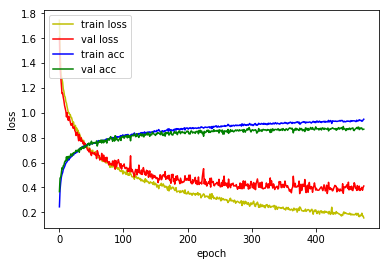

1560/1560 [==============================] - 3s 2ms/sample - loss: 0.3719 - acc: 0.8782
Loss: 0.3718592568467825 Accuracy: 0.8782051

Epoch 1/10000
25/25 [==============================] - 10s 388ms/step - loss: 1.4766 - acc: 0.3756

Epoch 00001: val_loss improved from inf to 1.47664, saving model to model/checkpoint/vis_imagenet_6_class_augmentation_2D_CNN_custom_ch_32_DO_050_DO_5_conv_checkpoint/001-1.4766.hdf5
74/74 [==============================] - 38s 511ms/step - loss: 1.6945 - acc: 0.2637 - val_loss: 1.4766 - val_acc: 0.3756
Epoch 2/10000
25/25 [==============================] - 10s 382ms/step - loss: 1.3374 - acc: 0.4776

Epoch 00002: val_loss improved from 1.47664 to 1.33744, saving model to model/checkpoint/vis_imagenet_6_class_augmentation_2D_CNN_custom_ch_32_DO_050_DO_5_conv_checkpoint/002-1.3374.hdf5
74/74 [==============================] - 34s 454ms/step - loss: 1.4616 - acc: 0.3925 - val_loss: 1.3374 - val_acc: 0.4776
Epoch 3/10000
25/25 [==============================]

25/25 [==============================] - 10s 383ms/step - loss: 0.8806 - acc: 0.6712

Epoch 00023: val_loss improved from 0.89240 to 0.88065, saving model to model/checkpoint/vis_imagenet_6_class_augmentation_2D_CNN_custom_ch_32_DO_050_DO_5_conv_checkpoint/023-0.8806.hdf5
74/74 [==============================] - 34s 459ms/step - loss: 0.9002 - acc: 0.6714 - val_loss: 0.8806 - val_acc: 0.6712
Epoch 24/10000
25/25 [==============================] - 10s 392ms/step - loss: 0.8408 - acc: 0.6974

Epoch 00024: val_loss improved from 0.88065 to 0.84078, saving model to model/checkpoint/vis_imagenet_6_class_augmentation_2D_CNN_custom_ch_32_DO_050_DO_5_conv_checkpoint/024-0.8408.hdf5
74/74 [==============================] - 34s 458ms/step - loss: 0.8630 - acc: 0.6906 - val_loss: 0.8408 - val_acc: 0.6974
Epoch 25/10000
25/25 [==============================] - 10s 398ms/step - loss: 0.8181 - acc: 0.6987

Epoch 00025: val_loss improved from 0.84078 to 0.81809, saving model to model/checkpoint/vis_i

Epoch 48/10000
25/25 [==============================] - 10s 387ms/step - loss: 0.6494 - acc: 0.7660

Epoch 00048: val_loss did not improve from 0.64625
74/74 [==============================] - 33s 448ms/step - loss: 0.6372 - acc: 0.7788 - val_loss: 0.6494 - val_acc: 0.7660
Epoch 49/10000
25/25 [==============================] - 10s 381ms/step - loss: 0.6607 - acc: 0.7673

Epoch 00049: val_loss did not improve from 0.64625
74/74 [==============================] - 33s 449ms/step - loss: 0.6061 - acc: 0.7846 - val_loss: 0.6607 - val_acc: 0.7673
Epoch 50/10000
25/25 [==============================] - 10s 385ms/step - loss: 0.6517 - acc: 0.7827

Epoch 00050: val_loss did not improve from 0.64625
74/74 [==============================] - 33s 450ms/step - loss: 0.6165 - acc: 0.7808 - val_loss: 0.6517 - val_acc: 0.7827
Epoch 51/10000
25/25 [==============================] - 10s 395ms/step - loss: 0.6458 - acc: 0.7660

Epoch 00051: val_loss improved from 0.64625 to 0.64576, saving model to model

Epoch 74/10000
25/25 [==============================] - 10s 381ms/step - loss: 0.5792 - acc: 0.7994

Epoch 00074: val_loss did not improve from 0.54310
74/74 [==============================] - 33s 444ms/step - loss: 0.5216 - acc: 0.8182 - val_loss: 0.5792 - val_acc: 0.7994
Epoch 75/10000
25/25 [==============================] - 9s 378ms/step - loss: 0.7879 - acc: 0.7346

Epoch 00075: val_loss did not improve from 0.54310
74/74 [==============================] - 33s 441ms/step - loss: 0.4840 - acc: 0.8306 - val_loss: 0.7879 - val_acc: 0.7346
Epoch 76/10000
25/25 [==============================] - 10s 386ms/step - loss: 0.5624 - acc: 0.8090

Epoch 00076: val_loss did not improve from 0.54310
74/74 [==============================] - 34s 458ms/step - loss: 0.5165 - acc: 0.8132 - val_loss: 0.5624 - val_acc: 0.8090
Epoch 77/10000
25/25 [==============================] - 10s 395ms/step - loss: 0.5653 - acc: 0.8032

Epoch 00077: val_loss did not improve from 0.54310
74/74 [====================

Epoch 102/10000
25/25 [==============================] - 10s 389ms/step - loss: 0.4875 - acc: 0.8353

Epoch 00102: val_loss improved from 0.50040 to 0.48753, saving model to model/checkpoint/vis_imagenet_6_class_augmentation_2D_CNN_custom_ch_32_DO_050_DO_5_conv_checkpoint/102-0.4875.hdf5
74/74 [==============================] - 33s 447ms/step - loss: 0.4496 - acc: 0.8415 - val_loss: 0.4875 - val_acc: 0.8353
Epoch 103/10000
25/25 [==============================] - 10s 384ms/step - loss: 0.5119 - acc: 0.8192

Epoch 00103: val_loss did not improve from 0.48753
74/74 [==============================] - 33s 446ms/step - loss: 0.4279 - acc: 0.8551 - val_loss: 0.5119 - val_acc: 0.8192
Epoch 104/10000
25/25 [==============================] - 10s 385ms/step - loss: 0.4963 - acc: 0.8295

Epoch 00104: val_loss did not improve from 0.48753
74/74 [==============================] - 34s 455ms/step - loss: 0.4338 - acc: 0.8412 - val_loss: 0.4963 - val_acc: 0.8295
Epoch 105/10000
25/25 [================

Epoch 158/10000
25/25 [==============================] - 10s 380ms/step - loss: 0.4824 - acc: 0.8449

Epoch 00158: val_loss did not improve from 0.42024
74/74 [==============================] - 33s 452ms/step - loss: 0.3297 - acc: 0.8874 - val_loss: 0.4824 - val_acc: 0.8449
Epoch 159/10000
25/25 [==============================] - 10s 381ms/step - loss: 0.4603 - acc: 0.8442

Epoch 00159: val_loss did not improve from 0.42024
74/74 [==============================] - 33s 451ms/step - loss: 0.3237 - acc: 0.8812 - val_loss: 0.4603 - val_acc: 0.8442
Epoch 160/10000
25/25 [==============================] - 10s 393ms/step - loss: 0.4222 - acc: 0.8468

Epoch 00160: val_loss did not improve from 0.42024
74/74 [==============================] - 34s 455ms/step - loss: 0.3094 - acc: 0.8932 - val_loss: 0.4222 - val_acc: 0.8468
Epoch 161/10000
25/25 [==============================] - 10s 385ms/step - loss: 0.4809 - acc: 0.8429

Epoch 00161: val_loss did not improve from 0.42024
74/74 [===============

Epoch 187/10000
25/25 [==============================] - 10s 391ms/step - loss: 0.4448 - acc: 0.8513

Epoch 00187: val_loss did not improve from 0.40612
74/74 [==============================] - 33s 452ms/step - loss: 0.2872 - acc: 0.8970 - val_loss: 0.4448 - val_acc: 0.8513
Epoch 188/10000
25/25 [==============================] - 10s 387ms/step - loss: 0.4882 - acc: 0.8359

Epoch 00188: val_loss did not improve from 0.40612
74/74 [==============================] - 34s 456ms/step - loss: 0.2924 - acc: 0.9045 - val_loss: 0.4882 - val_acc: 0.8359
Epoch 189/10000
25/25 [==============================] - 10s 391ms/step - loss: 0.4258 - acc: 0.8596

Epoch 00189: val_loss did not improve from 0.40612
74/74 [==============================] - 33s 446ms/step - loss: 0.2771 - acc: 0.9034 - val_loss: 0.4258 - val_acc: 0.8596
Epoch 190/10000
25/25 [==============================] - 10s 392ms/step - loss: 0.4738 - acc: 0.8442

Epoch 00190: val_loss did not improve from 0.40612
74/74 [===============

Epoch 246/10000
25/25 [==============================] - 10s 392ms/step - loss: 0.4324 - acc: 0.8667

Epoch 00246: val_loss did not improve from 0.38713
74/74 [==============================] - 34s 454ms/step - loss: 0.1990 - acc: 0.9248 - val_loss: 0.4324 - val_acc: 0.8667
Epoch 247/10000
25/25 [==============================] - 10s 393ms/step - loss: 0.4325 - acc: 0.8596

Epoch 00247: val_loss did not improve from 0.38713
74/74 [==============================] - 34s 459ms/step - loss: 0.1983 - acc: 0.9301 - val_loss: 0.4325 - val_acc: 0.8596
Epoch 248/10000
25/25 [==============================] - 10s 391ms/step - loss: 0.4232 - acc: 0.8590

Epoch 00248: val_loss did not improve from 0.38713
74/74 [==============================] - 34s 456ms/step - loss: 0.2125 - acc: 0.9239 - val_loss: 0.4232 - val_acc: 0.8590
Epoch 249/10000
25/25 [==============================] - 10s 399ms/step - loss: 0.4673 - acc: 0.8609

Epoch 00249: val_loss did not improve from 0.38713
74/74 [===============

Epoch 276/10000
25/25 [==============================] - 10s 390ms/step - loss: 0.4397 - acc: 0.8583

Epoch 00276: val_loss did not improve from 0.38713
74/74 [==============================] - 34s 461ms/step - loss: 0.1782 - acc: 0.9348 - val_loss: 0.4397 - val_acc: 0.8583
Epoch 277/10000
25/25 [==============================] - 10s 389ms/step - loss: 0.4334 - acc: 0.8679

Epoch 00277: val_loss did not improve from 0.38713
74/74 [==============================] - 34s 454ms/step - loss: 0.1989 - acc: 0.9263 - val_loss: 0.4334 - val_acc: 0.8679
Epoch 278/10000
25/25 [==============================] - 9s 380ms/step - loss: 0.4218 - acc: 0.8673

Epoch 00278: val_loss did not improve from 0.38713
74/74 [==============================] - 32s 436ms/step - loss: 0.1873 - acc: 0.9331 - val_loss: 0.4218 - val_acc: 0.8673
Epoch 279/10000
25/25 [==============================] - 10s 381ms/step - loss: 0.4394 - acc: 0.8558

Epoch 00279: val_loss did not improve from 0.38713
74/74 [================

Epoch 306/10000
25/25 [==============================] - 10s 390ms/step - loss: 0.3909 - acc: 0.8731

Epoch 00306: val_loss did not improve from 0.38713
74/74 [==============================] - 34s 453ms/step - loss: 0.1702 - acc: 0.9397 - val_loss: 0.3909 - val_acc: 0.8731
Epoch 307/10000
25/25 [==============================] - 10s 385ms/step - loss: 0.3756 - acc: 0.8788

Epoch 00307: val_loss improved from 0.38713 to 0.37564, saving model to model/checkpoint/vis_imagenet_6_class_augmentation_2D_CNN_custom_ch_32_DO_050_DO_5_conv_checkpoint/307-0.3756.hdf5
74/74 [==============================] - 33s 453ms/step - loss: 0.1619 - acc: 0.9442 - val_loss: 0.3756 - val_acc: 0.8788
Epoch 308/10000
25/25 [==============================] - 9s 380ms/step - loss: 0.4921 - acc: 0.8571

Epoch 00308: val_loss did not improve from 0.37564
74/74 [==============================] - 33s 448ms/step - loss: 0.1537 - acc: 0.9429 - val_loss: 0.4921 - val_acc: 0.8571
Epoch 309/10000
25/25 [=================

Epoch 365/10000
25/25 [==============================] - 10s 385ms/step - loss: 0.4099 - acc: 0.8712

Epoch 00365: val_loss did not improve from 0.37564
74/74 [==============================] - 33s 452ms/step - loss: 0.1371 - acc: 0.9496 - val_loss: 0.4099 - val_acc: 0.8712
Epoch 366/10000
25/25 [==============================] - 10s 396ms/step - loss: 0.4960 - acc: 0.8705

Epoch 00366: val_loss did not improve from 0.37564
74/74 [==============================] - 34s 458ms/step - loss: 0.1335 - acc: 0.9536 - val_loss: 0.4960 - val_acc: 0.8705
Epoch 367/10000
25/25 [==============================] - 9s 380ms/step - loss: 0.5103 - acc: 0.8519

Epoch 00367: val_loss did not improve from 0.37564
74/74 [==============================] - 33s 447ms/step - loss: 0.1319 - acc: 0.9528 - val_loss: 0.5103 - val_acc: 0.8519
Epoch 368/10000
25/25 [==============================] - 10s 382ms/step - loss: 0.4536 - acc: 0.8673

Epoch 00368: val_loss did not improve from 0.37564
74/74 [================

Epoch 395/10000
25/25 [==============================] - 10s 387ms/step - loss: 0.4260 - acc: 0.8840

Epoch 00395: val_loss did not improve from 0.37564
74/74 [==============================] - 33s 449ms/step - loss: 0.1040 - acc: 0.9630 - val_loss: 0.4260 - val_acc: 0.8840
Epoch 396/10000
25/25 [==============================] - 10s 385ms/step - loss: 0.4408 - acc: 0.8731

Epoch 00396: val_loss did not improve from 0.37564
74/74 [==============================] - 33s 451ms/step - loss: 0.1180 - acc: 0.9622 - val_loss: 0.4408 - val_acc: 0.8731
Epoch 397/10000
25/25 [==============================] - 10s 384ms/step - loss: 0.4173 - acc: 0.8814

Epoch 00397: val_loss did not improve from 0.37564
74/74 [==============================] - 33s 439ms/step - loss: 0.1272 - acc: 0.9541 - val_loss: 0.4173 - val_acc: 0.8814
Epoch 398/10000
25/25 [==============================] - 10s 399ms/step - loss: 0.4906 - acc: 0.8686

Epoch 00398: val_loss did not improve from 0.37564
74/74 [===============

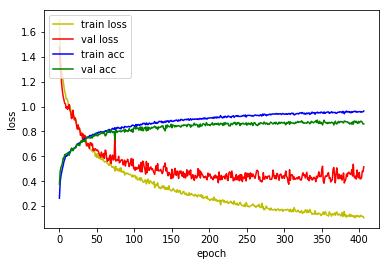

1560/1560 [==============================] - 3s 2ms/sample - loss: 0.4031 - acc: 0.8782
Loss: 0.40313253295727264 Accuracy: 0.8782051



In [13]:
for i in range(3, 6):
    base = 'vis_imagenet_6_class_augmentation_2D_CNN_custom_ch_32_DO_050_DO'
    model_name = base+'_{}_conv'.format(i)
    model = build_2d_cnn_custom_ch_32_DO(conv_num=i)
#     model = multi_gpu_model(model, gpus=2)
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4),
          metrics=['accuracy'])
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    os.makedirs(model_path, exist_ok=True)
    model_filename = model_path+'{epoch:03d}-{val_loss:.4f}.hdf5'
    checkpointer = ModelCheckpoint(filepath = model_filename, monitor = "val_loss", 
                                   verbose=1, save_best_only=True)

    early_stopping = EarlyStopping(monitor='val_loss', patience=100)
    hist = model.fit_generator(
            data_generator.flow(x_train, y_train, batch_size=64),
            steps_per_epoch=len(x_train)//64,
            epochs=10000,
            validation_data=data_generator.flow(x_val, y_val, batch_size=64),
            validation_steps=len(x_val)//64,
            callbacks = [checkpointer, early_stopping],
            workers=4, 
            use_multiprocessing=True
    )
    
    print()
    print(model_name, 'Model')
    fig, ax = plt.subplots()
    ax.plot(hist.history['loss'], 'y', label='train loss')
    ax.plot(hist.history['val_loss'], 'r', label='val loss')
    ax.plot(hist.history['acc'], 'b', label='train acc')
    ax.plot(hist.history['val_acc'], 'g', label='val acc')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    ax.legend(loc='upper left')
    plt.show()

    png_path = 'visualization/learning_curve/'
    filename = model_name+'.png'
    os.makedirs(png_path, exist_ok=True)
    fig.savefig(png_path+filename, transparent=True)

    model.save(model_path+'000_last.hdf5')
    del(model)

    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + sorted(os.listdir(model_path))[-1]
    model = load_model(model_filename)
    [loss, accuracy] = model.evaluate(x_test, y_test)
    print('Loss:', loss, 'Accuracy:', accuracy)
    print()

    del(model)

In [11]:
log_dir = 'log'
os.makedirs(log_dir, exist_ok=True)
base = 'vis_imagenet_6_class_augmentation_2D_CNN_custom_ch_32_DO_050_DO'

with open(path.join(log_dir, base), 'w') as log_file:
    for i in range(3, 6):
        model_name = base+'_{}_conv'.format(i)
        print()
        print(model_name, 'Model')
        model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
        model_filename = model_path + sorted(os.listdir(model_path))[-1]

        model = load_model(model_filename)
        model.summary()

        [loss, accuracy] = model.evaluate(x_test, y_test)
        print('Loss:', loss, 'Accuracy:', accuracy)

        del(model)

        log_file.write('\t'.join([model_name, str(accuracy), str(loss)])+'\n')


vis_imagenet_6_class_augmentation_2D_CNN_custom_ch_32_DO_050_DO_3_conv Model
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 341, 341, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 341, 341, 32)      2432      
_________________________________________________________________
activation_15 (Activation)   (None, 341, 341, 32)      0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 114, 114, 32)      0         
_________________________________________________________________
conv2d_16 (Conv2D)         

1560/1560 [==============================] - 3s 2ms/sample - loss: 0.4214 - acc: 0.8865
Loss: 0.4213929840387442 Accuracy: 0.88653845


In [12]:
for i in range(3, 6):
    model_name = base+'_{}_conv'.format(i)
    print()
    print(model_name, 'Model')
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + '000_last.hdf5'

    model = load_model(model_filename)
    model.summary()

    [loss, accuracy] = model.evaluate(x_test, y_test)
    print('Loss:', loss, 'Accuracy:', accuracy)

    del(model)


vis_imagenet_6_class_augmentation_2D_CNN_custom_ch_32_DO_050_DO_3_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 341, 341, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 341, 341, 32)      2432      
_________________________________________________________________
activation_15 (Activation)   (None, 341, 341, 32)      0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 114, 114, 32)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 114, 114, 32)      25632     
_________________________________________________________________
activation_16 (Activation)   (None, 114, 114, 32)      0         
________________________________________________________________